In [15]:
# Dependencies and Setup
import pandas as pd

# File to Load (Remember to Change These)
file_to_load = "chicago_populationdata.csv"

# Read Purchasing File and store into Pandas data frame
chicago_pop = pd.read_csv(file_to_load)
chicago_pop

,ID Race,Race,ID Ethnicity,Ethnicity,ID Year,Year,Hispanic Population Moe,Geography,ID Geography,Slug Geography,Population,share
0,1,Black or African American Alone,0,Not Hispanic or Latino,2018,2018,11727.000000,"Chicago, IL",16000US1714000,chicago-il,784266,0.289826
1,6,Two or More Races,1,Hispanic or Latino,2018,2018,3962.520536,"Chicago, IL",16000US1714000,chicago-il,26453,0.009776
2,0,White Alone,0,Not Hispanic or Latino,2018,2018,15232.000000,"Chicago, IL",16000US1714000,chicago-il,899980,0.332588
3,5,Some Other Race Alone,1,Hispanic or Latino,2018,2018,16083.000000,"Chicago, IL",16000US1714000,chicago-il,240252,0.088785
4,0,White Alone,1,Hispanic or Latino,2018,2018,16765.000000,"Chicago, IL",16000US1714000,chicago-il,489985,0.181074
...,...,...,...,...,...,...,...,...,...,...,...,...
79,5,Some Other Race Alone,1,Hispanic or Latino,2013,2013,13933.000000,"Chicago, IL",16000US1714000,chicago-il,290196,0.106737
80,1,Black or African American Alone,1,Hispanic or Latino,2013,2013,2792.000000,"Chicago, IL",16000US1714000,chicago-il,11023,0.004054
81,4,Native Hawaiian & Other Pacific Islander Alone,0,Not Hispanic or Latino,2013,2013,271.000000,"Chicago, IL",16000US1714000,chicago-il,663,0.000244
82,1,Black or African American Alone,0,Not Hispanic or Latino,2013,2013,10446.000000,"Chicago, IL",16000US1714000,chicago-il,852519,0.313566


In [6]:
chicago_pop.columns = map(str.lower, chicago_pop.columns)
chicago_pop.columns = ['id_race', 'race', 'id_eth', 'ethnicity', 'id_year', 'year',
       'hispanic_pop', 'geography', 'id_geography',
       'slug_geography', 'population', 'share']
chicago_pop

In [14]:
chicago_pop_2018 = chicago_pop.loc[chicago_pop['id_year'] == 2018,["race","ethnicity","hispanic_pop","population"]]
chicago_pop_2018

,race,ethnicity,hispanic_pop,population
0,Black or African American Alone,Not Hispanic or Latino,11727.000000,784266
1,Two or More Races,Hispanic or Latino,3962.520536,26453
2,White Alone,Not Hispanic or Latino,15232.000000,899980
3,Some Other Race Alone,Hispanic or Latino,16083.000000,240252
4,White Alone,Hispanic or Latino,16765.000000,489985
5,Some Other Race Alone,Not Hispanic or Latino,2863.000000,8185
6,Native Hawaiian & Other Pacific Islander Alone,Hispanic or Latino,253.000000,254
7,Two or More Races,Not Hispanic or Latino,6175.027287,54227
8,Native Hawaiian & Other Pacific Islander Alone,Not Hispanic or Latino,288.000000,247
9,Black or African American Alone,Hispanic or Latino,3285.000000,13223


In [50]:
chicago_race = chicago_pop_2018.groupby('race',as_index=True)
race_count = pd.DataFrame(chicago_race['population'].sum())

In [52]:
race_count.index

Index(['American Indian & Alaska Native Alone', 'Asian Alone',
       'Black or African American Alone',
       'Native Hawaiian & Other Pacific Islander Alone',
       'Some Other Race Alone', 'Two or More Races', 'White Alone'],
      dtype='object', name='race')

In [46]:
chicago_ethnicity = chicago_pop_2018.groupby('ethnicity',as_index=True)
ethnicity_count = pd.DataFrame(chicago_ethnicity['population'].sum())

In [49]:
ethnicity_count.index

Index(['Hispanic or Latino', 'Not Hispanic or Latino'], dtype='object', name='ethnicity')

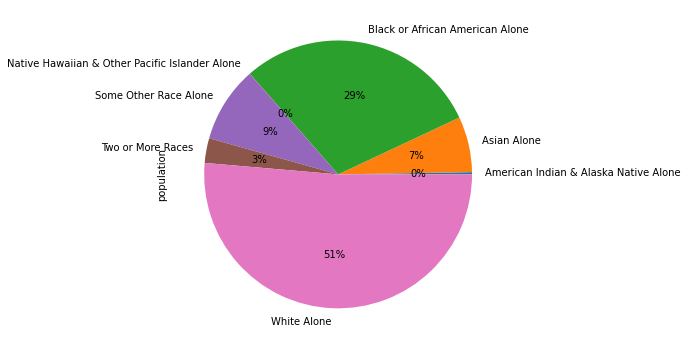

In [74]:
race_plot = race_count.plot.pie(y='population', figsize=(6, 10), autopct='%1.0f%%',legend=False)

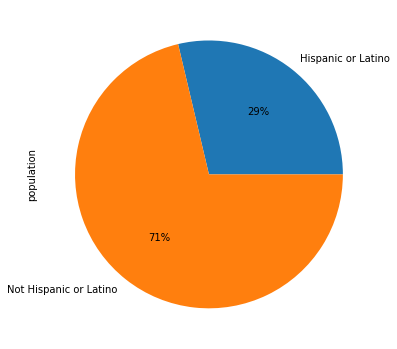

In [75]:
ethnicity_count = ethnicity_count.plot.pie(y='population', figsize=(6, 10), autopct='%1.0f%%',legend=False)